In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from helper_functions import regressor, scatter_compare, data_cleaner, date_to_decimal_year, frame_compare

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))


In [6]:
volcanos = {'Wolf': (-91.35, .05), 'Fernandina': (-91.55, -.35), 'Negra, Sierra': (-91.15, -.85), 'Azul, Cerro': (-91.35, -.95), 'Ayora': (-90.25, -.65) } # Long/lat pairs must exist in rainfall data
pick = 'Ayora' # Choose a volcano to analyze rainfall at
compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
site_name = 'Ayora' # Same choice as for compare_site, but as a string and capitalized
rolling_number = 90 # Number of days to average rainfall over
print_summary = False # Make true if you want to see summary of regression

In [8]:
compare_frame = frame_compare(rainfall, volcanos, pick, compare_site, rolling_number)
categories = np.array(compare_frame['Decimal'])
values1 = np.array(compare_frame['roll_two'])
values2 = np.array(compare_frame['roll'])

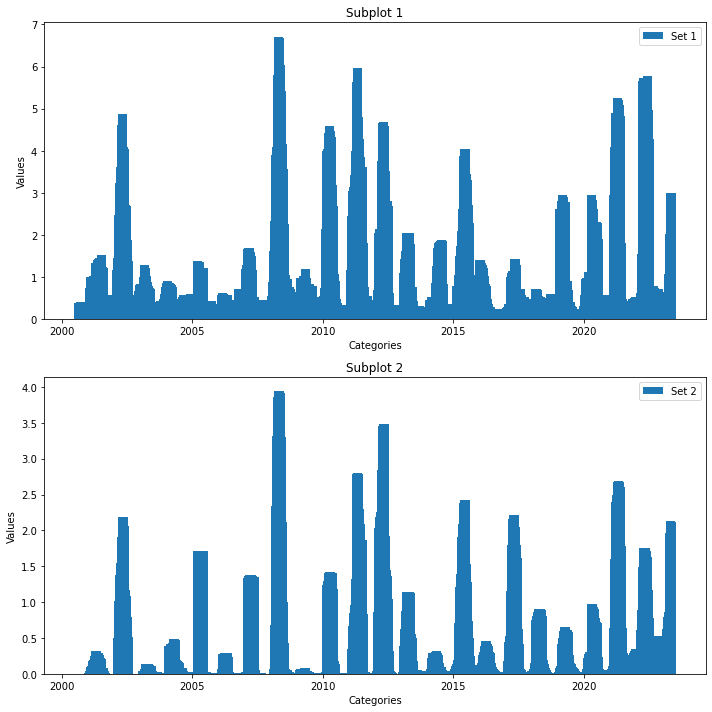

In [12]:

bar_width = 0.35
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot the first set of bars in the first subplot
ax1.bar(categories, values1, width=bar_width, label='Set 1')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Values')
ax1.set_title('Subplot 1')
ax1.legend()

# Plot the second set of bars in the second subplot
ax2.bar(categories, values2, width=bar_width, label='Set 2')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Values')
ax2.set_title('Subplot 2')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
print(ayora_clean)

      observation_date  min_air_temp  max_air_temp  mean_air_temp  sea_temp  \
0           1964-12-31          22.2          30.8           26.1      25.8   
1           1965-01-01          21.0          25.8           23.9      22.7   
2           1965-01-02          21.1          26.2           23.4      22.4   
3           1965-01-03          22.0          26.6           23.7      23.1   
4           1965-01-04           NaN          26.6           24.0      23.1   
...                ...           ...           ...            ...       ...   
21291       2023-05-06          21.9          31.0           27.2      28.7   
21292       2023-05-07          20.6          31.4           27.0      28.7   
21293       2023-05-08          21.7          30.0           27.3      28.9   
21294       2023-05-09          23.1          29.8           27.1      29.0   
21295       2023-05-10          21.8          29.9           26.8      28.9   

       humidity  precipitation  sunshine_hours  clo

In [46]:
rs = []
for i in range(200, 300):
    reg = regressor(rainfall, volcanos, pick, compare_site, i+1, print_summary)
    rs.append(reg.rsquared)
print(max(rs))

0.6843707191567352


In [10]:
# rs = []
# picks = []
# first_pick = pick
# for i in range(53):
#     for j in range(42):
#         volcanos[(i,j)] = (round(-92.45 + (i * .1), 2), round(-2.15 + (j * .1), 2))
#         pick = (i,j)
#         reg = regressor(rainfall, volcanos, pick, compare_site, rolling_number, print_summary)
#         rs.append(reg.rsquared)
#         picks.append(pick)
# best = max(rs)
# print(max(rs))
# print(picks[rs.index(best)])

0.7767696171526597
(8, 31)


In [18]:
# zipped = [[i,j] for i,j in zip(rs,picks)]
# sort_zip = sorted(zipped, key=lambda x: x[0], reverse=True)
# print(sort_zip)

[[0.7767696171526597, (8, 31)], [0.7575939379536952, (11, 9)], [0.7551162941384478, (7, 31)], [0.7446698655795974, (9, 31)], [0.7434639477348493, (8, 30)], [0.7405253164599919, (9, 29)], [0.7315365301324366, (6, 31)], [0.7291796560182562, (9, 30)], [0.7285431014989718, (17, 28)], [0.7271408876479597, (9, 32)], [0.7244735702597095, (6, 32)], [0.7235919423252997, (16, 28)], [0.7225692565750123, (7, 30)], [0.7223576131444538, (14, 29)], [0.7217840198553438, (8, 32)], [0.7177987076992399, (14, 28)], [0.7177592345062924, (17, 27)], [0.7154070847184005, (10, 9)], [0.7119591276077397, (15, 28)], [0.7054127143223818, (20, 27)], [0.7052342085949848, (13, 29)], [0.7003982832334665, (8, 29)], [0.7001750275387137, (13, 28)], [0.6988020962673429, (10, 31)], [0.697840257582037, (16, 27)], [0.6973132095662357, (9, 28)], [0.6964587960691053, (10, 29)], [0.6952287671576309, (36, 26)], [0.6929314089229455, (12, 29)], [0.6926907838433328, (13, 9)], [0.692293500007694, (14, 30)], [0.692288949156361, (6, 3

In [24]:
# ayora_preds = pd.DataFrame({'Longitude': np.array([round(-92.45 + (i[0]*.1),2) for i in picks]), 'Latitude': np.array([round(-2.15 + (i[1]*.1),2) for i in picks]), 'R Squared': np.array(rs)})
# print(ayora_preds)
# ayora_preds.to_csv("ayora_preds.csv")

      Longitude  Latitude  R Squared
0        -92.45     -2.15   0.406396
1        -92.45     -2.05   0.384502
2        -92.45     -1.95   0.390978
3        -92.45     -1.85   0.421215
4        -92.45     -1.75   0.473151
...         ...       ...        ...
2221     -87.25      1.55   0.507684
2222     -87.25      1.65   0.597532
2223     -87.25      1.75   0.570682
2224     -87.25      1.85   0.570357
2225     -87.25      1.95   0.532352

[2226 rows x 3 columns]


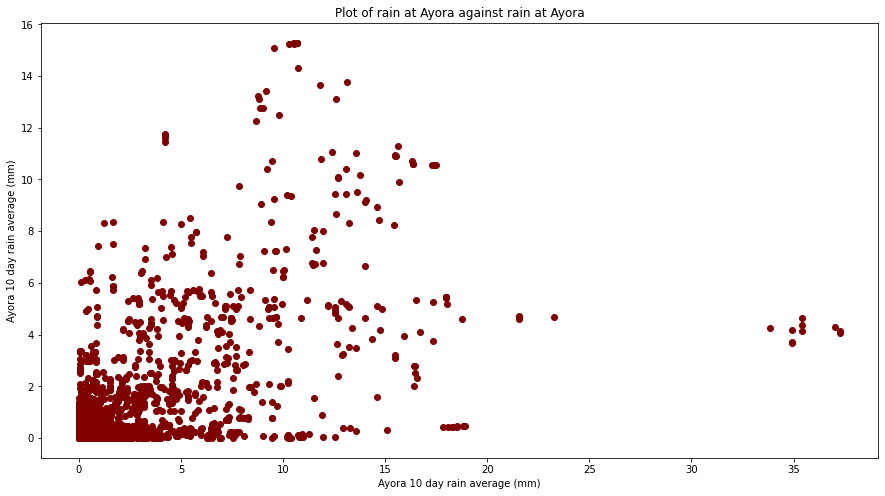

In [33]:
scatter_compare(rainfall, volcanos, pick, compare_site, site_name, rolling_number)